In [5]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

# Define constants
rho = 1
c = 3.00*(10**8)
h_bar = (6.63*10**-34)/(2*np.pi)
epsilon = rho*(c**2)
m_N = (((1.6749*10**-27 * 6) + (1.6726*10**-27 * 6))/12)
m_n = (1.6749*10**-27)
m_p = (1.6726*10**-27)
m_e = (9.11*10**-31)
G = 6.67*10**-11

k_F_div1 = np.linspace(0.01, 1, 100) 
k_F_div2 = np.linspace(1.01, 10, 1000)

k_F_div = k_F_div1.tolist() + k_F_div2.tolist()

k_Fs = np.array(k_F_div)*(m_n*c)
k_Fs_p = ((k_Fs**2+m_n**2-m_e**2)**2-2*m_p**2*(k_Fs**2+m_n**2+m_e**2)+m_e**4)**0.5/(2*(k_Fs**2+m_n**2)**0.5)     # Fermi momentum for both protons and electrons

k_F_div_p = k_Fs_p/(m_p*c)
k_F_div_e = k_Fs_p/(m_e*c)

Densities = (m_n/(3*np.pi**2))*(k_Fs/h_bar)**3

A_NR_tot = 4.51477791e+14
A_R_tot = 2.95921102

In [6]:
def dM_dr_npe(P, m, r):
    dMdr = (4*np.pi*r**2*(A_NR_tot*P**(3/5) + A_R_tot*P))/(c**2)
    return dMdr

def dP_dr_cos(P, m, r, A):
    dPdr = -(((A_NR_tot*P**(3/5) + A_R_tot*P)+P)/c**2)*(G*(m+(4*np.pi*r**3*P)/c**2)-(c**2*A*r**3)/2)*(r**2*(1-(2*G*m)/(c**2*r)))**(-1)
    return dPdr
def integrate_max_cos(P, m, A):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_npe(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_cos(P, m, r, A)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return m, r

def results_cos(P, m, A):
    M_maxs = []
    Radii = []
    B = A
    for i in range(0, len(P)):
        M_max, Radius = integrate_max_cos(P[i], m, B)
        M_maxs = M_maxs + [M_max/(1.989*10**30)]
        Radii = Radii + [Radius/1000]
    return M_maxs, Radii

Cero = np.linspace(10**31, 10**32, 101)
Uno = np.linspace(10**32, 10**33, 101)
Dos = np.linspace(10**33, 10**34, 101)
Tres = np.linspace(10**34, 10**35, 101)
Quatro = np.linspace(10**35, 10**36, 101)
Cinco = np.linspace(10**36, 10**37, 101)
Siez = np.linspace(10**37, 10**38, 101)

P_central = Cero.tolist() + Uno.tolist() + Dos.tolist() + Tres.tolist() + Quatro.tolist() + Cinco.tolist()
P_central2 = Dos.tolist() + Tres.tolist() + Quatro.tolist() + Cinco.tolist() + Siez.tolist()

Mass_cos0, Radius_cos0 = results_cos(P_central, 0, 0)
Mass_cos1, Radius_cos1 = results_cos(P_central, 0, -(10**-10))
Mass_cos2, Radius_cos2 = results_cos(P_central, 0, -(5*10**-10))
Mass_cos3, Radius_cos3 = results_cos(P_central, 0, -(10**-9))
Mass_cos4, Radius_cos4 = results_cos(P_central, 0, -(2*10**-9))
Mass_cos5, Radius_cos5 = results_cos(P_central, 0, -(5*10**-9))
Mass_cos6, Radius_cos6 = results_cos(P_central, 0, -(3*10**-9))
Mass_cos7, Radius_cos7 = results_cos(P_central, 0, -(4*10**-9))
Mass_cos8, Radius_cos8 = results_cos(P_central, 0, -(2.5*10**-10))
Mass_cos9, Radius_cos9 = results_cos(P_central, 0, -(7.5*10**-10))
Mass_cos10, Radius_cos10 = results_cos(P_central, 0, -(1.5*10**-9))
Mass_cos11, Radius_cos11 = results_cos(P_central, 0, -(2.5*10**-9))
Mass_cos12, Radius_cos12 = results_cos(P_central, 0, -(3.5*10**-9))
Mass_cos13, Radius_cos13 = results_cos(P_central, 0, -(4.5*10**-9))
Mass_cos_real, Radius_cos_real = results_cos(P_central, 0, -(1.934*10**-52))

(0.5, 0.84)

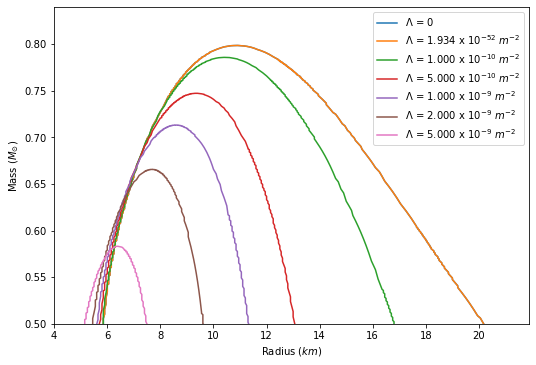

In [7]:
plt.figure(1).add_axes((0,0,1.1,1.1))
plt.plot(Radius_cos0, Mass_cos0, label = '$\Lambda$ = 0')
plt.plot(Radius_cos_real, Mass_cos_real, label = '$\Lambda$ = 1.934 x 10$^{-52}$ $m^{-2}$')
plt.plot(Radius_cos1, Mass_cos1, label = '$\Lambda$ = 1.000 x 10$^{-10}$ $m^{-2}$')
plt.plot(Radius_cos2, Mass_cos2, label = '$\Lambda$ = 5.000 x 10$^{-10}$ $m^{-2}$')
plt.plot(Radius_cos3, Mass_cos3, label = '$\Lambda$ = 1.000 x 10$^{-9}$ $m^{-2}$')
plt.plot(Radius_cos4, Mass_cos4, label = '$\Lambda$ = 2.000 x 10$^{-9}$ $m^{-2}$')
plt.plot(Radius_cos5, Mass_cos5, label = '$\Lambda$ = 5.000 x 10$^{-9}$ $m^{-2}$')

plt.xlabel("Radius ($km$)")
plt.ylabel("Mass ($M_{\odot}$)")
plt.legend(loc = 'upper right')
plt.xlim([4, 21.9])
plt.ylim([0.5,0.84])

In [8]:
# Star or note the important ones for the table

Max_Mass_0 = max(Mass_cos0)
Max_Mass_1 = max(Mass_cos1)
Max_Mass_2 = max(Mass_cos2)
Max_Mass_3 = max(Mass_cos3)
Max_Mass_4 = max(Mass_cos4)
Max_Mass_5 = max(Mass_cos5)
Max_Mass_6 = max(Mass_cos6)
Max_Mass_7 = max(Mass_cos7)
Max_Mass_8 = max(Mass_cos8)
Max_Mass_9 = max(Mass_cos9)
Max_Mass_10 = max(Mass_cos10)
Max_Mass_11 = max(Mass_cos11)
Max_Mass_12 = max(Mass_cos12)
Max_Mass_13 = max(Mass_cos13)
Max_Mass_real = max(Mass_cos_real)

print ('Max Mass 0 :', Max_Mass_0, "Solar Masses **")
print ('Max Mass real :', Max_Mass_real, "Solar Masses **")
print ('Max Mass 1 :', Max_Mass_1, "Solar Masses **")
print ('Max Mass 2 :', Max_Mass_2, "Solar Masses **")
print ('Max Mass 3 :', Max_Mass_3, "Solar Masses **")
print ('Max Mass 4 :', Max_Mass_4, "Solar Masses **")
print ('Max Mass 5 :', Max_Mass_5, "Solar Masses **")
print ('-')

def find_P(m, M, P, R):
    N = 1
    for i in range(0, len(m)):
        if m[i] == M:
            N = i
        else:
            N = N
    return P[N], R[N]

P0, R0 = find_P(Mass_cos0, Max_Mass_0, P_central, Radius_cos0)
Preal, Rreal = find_P(Mass_cos_real, Max_Mass_real, P_central, Radius_cos_real)
P1, R1 = find_P(Mass_cos1, Max_Mass_1, P_central, Radius_cos1)
P2, R2 = find_P(Mass_cos2, Max_Mass_2, P_central, Radius_cos2)
P3, R3 = find_P(Mass_cos3, Max_Mass_3, P_central, Radius_cos3)
P4, R4 = find_P(Mass_cos4, Max_Mass_4, P_central, Radius_cos4)
P5, R5 = find_P(Mass_cos5, Max_Mass_5, P_central, Radius_cos5)

print ('Central Pressure 0 :', P0, 'Pa')
print ('Central Pressure real :', Preal, 'Pa')
print ('Central Pressure 1 :', P1, 'Pa')
print ('Central Pressure 2 :', P2, 'Pa')
print ('Central Pressure 3 :', P3, 'Pa')
print ('Central Pressure 4 :', P4, 'Pa')
print ('Central Pressure 5 :', P5, 'Pa')
print ('-')
print ('Radius 0 :', R0, 'km')
print ('Radius real :', Rreal, 'km')
print ('Radius 1 :', R1, 'km')
print ('Radius 2 :', R2, 'km')
print ('Radius 3 :', R3, 'km')
print ('Radius 4 :', R4, 'km')
print ('Radius 5 :', R5, 'km')

Max_Masses = np.array([Max_Mass_0, Max_Mass_real, Max_Mass_1, Max_Mass_8, Max_Mass_2, Max_Mass_9, Max_Mass_3, Max_Mass_10, Max_Mass_4, Max_Mass_11, Max_Mass_6, Max_Mass_12, Max_Mass_7, Max_Mass_13, Max_Mass_5])
Cos_constants = np.array([0, (1.934*10**-52), (10**-10), (2.5*10**-10), (5*10**-10), (7.5*10**-10), (10**-9), (1.5*10**-9), (2*10**-9), (2.5*10**-9), (3*10**-9), (3.5*10**-9), (4*10**-9), (4.5*10**-9), (5*10**-9)])

Max Mass 0 : 0.7987060791910544 Solar Masses **
Max Mass real : 0.7987060791910544 Solar Masses **
Max Mass 1 : 0.7859484425426055 Solar Masses **
Max Mass 2 : 0.7473971991763103 Solar Masses **
Max Mass 3 : 0.7132996555629002 Solar Masses **
Max Mass 4 : 0.6657004956408387 Solar Masses **
Max Mass 5 : 0.5831736675367215 Solar Masses **
-
Central Pressure 0 : 2.17e+34 Pa
Central Pressure real : 2.17e+34 Pa
Central Pressure 1 : 2.5300000000000003e+34 Pa
Central Pressure 2 : 3.79e+34 Pa
Central Pressure 3 : 5.14e+34 Pa
Central Pressure 4 : 7.57e+34 Pa
Central Pressure 5 : 1.36e+35 Pa
-
Radius 0 : 10.901 km
Radius real : 10.901 km
Radius 1 : 10.451 km
Radius 2 : 9.351 km
Radius 3 : 8.601 km
Radius 4 : 7.701 km
Radius 5 : 6.401 km


[ 1.45437061e+08 -1.14273091e+16  1.25944768e+00]
[4.76783337e+06 1.08329432e+15 3.17449130e-03]


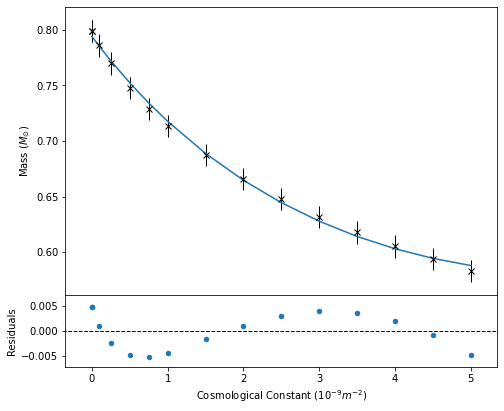

In [9]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return 1/(a*x + b*x**2 + c)

popt, pcov = curve_fit(func, Cos_constants, Max_Masses, p0 = [1.45*10**8, -1.1*10**16, 1.265])

print(popt)

errors = np.linspace(0.01, 0.01, len(Cos_constants))

plt.figure(1).add_axes((0,0,1,1))

plt.plot(Cos_constants/(10**(-9)), func(Cos_constants, *popt), label = 'Trendline')

plt.errorbar(Cos_constants/(10**(-9)), Max_Masses, yerr = errors, ls = 'none', elinewidth = 1, marker = 'x', label = 'Maximum Masses', color = 'black')
plt.xlim([-0.35, 5.35])

plt.xlabel("Cosmological Constant ($m^{-2}$)")
plt.ylabel("Mass ($M_{\odot}$)")

a, b, c = popt

Fit_values = 1/(a*Cos_constants + b*Cos_constants**2 + c)
Residuals = Max_Masses-np.array(Fit_values)

plt.figure(1).add_axes((0,-0.25,1,0.25))
plt.plot(np.linspace(-2.5, 55, len(Cos_constants)), np.linspace(0,0,len(Cos_constants)), color = 'black', linewidth = 1.0, linestyle = 'dashed')
plt.scatter(Cos_constants/(10**(-9)), Residuals, s = 20)
plt.ylabel("Residuals")
plt.xlabel("Cosmological Constant ($10^{-9} m^{-2}$)")
plt.gca().set_ylim([-0.0072,0.0072])
plt.gca().set_xlim([-0.35, 5.35])
plt.savefig('Mass vs Constant.pdf', format = 'pdf')

perr = np.sqrt(np.diag(pcov))

print(perr)

Text(0.5, 0, 'Residuals')

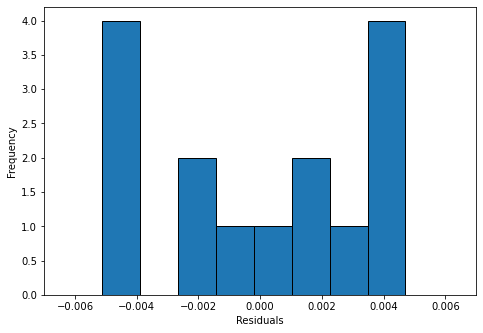

In [10]:
plt.figure(1).add_axes((0,0,1,1))
plt.hist(Residuals, bins = 8, histtype='bar', ec='black')
plt.xlim([-0.007,0.007])
plt.ylabel("Frequency")
plt.xlabel("Residuals")

In [93]:
def integrate_cos(P, m, A):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_npe(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_cos(P, m, r, A)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return np.array(Masses), np.array(Pressures), np.array(Radii)

Int_mass_cos0, Int_pressure_cos0, Int_radius_cos0 = integrate_cos(10**34, 0, 0)
Int_mass_cos1, Int_pressure_cos1, Int_radius_cos1 = integrate_cos(10**34, 0, -(10**-10))
Int_mass_cos2, Int_pressure_cos2, Int_radius_cos2 = integrate_cos(10**34, 0, -(5*10**-10))
Int_mass_cos3, Int_pressure_cos3, Int_radius_cos3 = integrate_cos(10**34, 0, -(10**-9))
Int_mass_cos4, Int_pressure_cos4, Int_radius_cos4 = integrate_cos(10**34, 0, -(2*10**-9))
Int_mass_cos5, Int_pressure_cos5, Int_radius_cos5 = integrate_cos(10**34, 0, -(5*10**-9))

plt.plot(Int_radius_cos0/1000, Int_mass_cos0/(1.989*10**30), label = 'CC0')
plt.plot(Int_radius_cos1/1000, Int_mass_cos1/(1.989*10**30), label = 'CC1')
plt.plot(Int_radius_cos2/1000, Int_mass_cos2/(1.989*10**30), label = 'CC2')
plt.plot(Int_radius_cos3/1000, Int_mass_cos3/(1.989*10**30), label = 'CC3')
plt.plot(Int_radius_cos4/1000, Int_mass_cos4/(1.989*10**30), label = 'CC4')
plt.plot(Int_radius_cos5/1000, Int_mass_cos5/(1.989*10**30), label = 'CC5')

plt.xlabel("Distance From Centre ($km$)")
plt.ylabel("Enclosed Mass ($M_{\odot}$)")
plt.legend(loc = 'upper left')

KeyboardInterrupt: 

In [13]:
plt.plot(Int_radius_cos0/1000, Int_pressure_cos0, label = 'CC0')
plt.plot(Int_radius_cos1/1000, Int_pressure_cos1, label = 'CC1')
plt.plot(Int_radius_cos2/1000, Int_pressure_cos2, label = 'CC2')
plt.plot(Int_radius_cos3/1000, Int_pressure_cos3, label = 'CC3')
plt.plot(Int_radius_cos4/1000, Int_pressure_cos4, label = 'CC4')
plt.plot(Int_radius_cos5/1000, Int_pressure_cos5, label = 'CC5')

plt.xlabel("Distance From Centre ($km$)")
plt.ylabel("Pressure At r ($Pa$)")
plt.legend(loc = 'upper right')

NameError: name 'Int_radius_cos0' is not defined

[4.80213123e+10 2.13031148e+21 5.94116168e-01]
[1.66875752e+09 2.14070380e+20 9.29924242e-04]


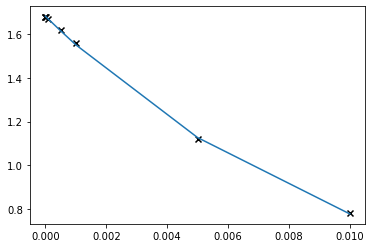

In [19]:
Constants_lit = np.array([0, (10**-15), (10**-14), (10**-13), (5*10**-13), (10**-12), (5*10**-12), (10**-11)])
Masses_lit = np.array([1.68, 1.68, 1.68, 1.67, 1.62, 1.56, 1.12, 0.78])

popt_lit, pcov_lit = curve_fit(func, Constants_lit, Masses_lit, p0 = [1.45*10**8, -1.1*10**16, 1.265])

print(popt_lit)

perr_lit = np.sqrt(np.diag(pcov_lit))

print(perr_lit)

plt.plot(Constants_lit/(10**(-9)), func(Constants_lit, *popt_lit), label = 'Trendline')

plt.scatter(Constants_lit/(10**(-9)), Masses_lit, marker = 'x', label = 'Maximum Masses', color = 'black')

In [22]:
print((h_bar*((3*(10**9)*np.pi**2)/m_n)**(1/3))/(m_n*c))

130309.28189506498
